<h3>MNIST 학습한 모델로 직접 쓴 데이터(사진) 넣어서 결과 확인하기


In [1]:
# 드라이브에 접근 # 파일 직접 업로드방식
from google.colab import files
myfile = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# 사진 흑백 변환
# OpenCV 함수 사용
import cv2

im = cv2.imread('homework.jpg')
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
cv2.imwrite('homework_gray.jpg',im_gray)
print(im_gray.shape)

(960, 960)


In [ ]:
im_gray_resize = cv2.resize(im_gray,dsize=(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
im_gray_resize.shape

(28, 28)

In [ ]:
im_gray_resize = im_gray_resize.reshape((1,28*28))
im_test=im_gray_resize.astype('float32')/255

In [ ]:
im_test.shape

(1, 784)

---------------

In [ ]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [ ]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)


In [ ]:
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images,train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4611 - accuracy: 0.8701
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9664
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9867
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9894


In [ ]:
test_loss , test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9808


In [ ]:
# 모델 적용
imtest_predict = network.predict(im_test) 

In [ ]:
print(np.argmax(imtest_predict))

3


In [ ]:
imtest_predict

array([[1.0439997e-11, 1.2843840e-15, 2.9249841e-05, 8.8816458e-01,
        5.9159278e-25, 1.1047859e-01, 7.0900380e-05, 1.6848992e-07,
        1.2565848e-03, 8.6719741e-14]], dtype=float32)

-----------

<h3><b> 최종 </b></h3>

In [1]:
# 필요 import 
import cv2
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [7]:
# 모델 생성

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

network.fit(train_images,train_labels, epochs = 5, batch_size = 128)
test_loss , test_acc = network.evaluate(test_images, test_labels)


Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2658 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1066 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0700 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0495 - accuracy: 0.9856
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step


In [ ]:
# 모델 적용#
myfile = files.upload() # 업로드

for n in myfile.keys():
  im = cv2.imread(n)
                                                                                                                     
# 흑백 변환
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# 배경 전환
back = cv2.adaptiveThreshold(im_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,51,18)
# 사이즈 축소
im_gray_resize = cv2.resize(back,dsize=(28,28),interpolation=cv2.INTER_AREA)
# 전처리
im_gray_resize = im_gray_resize.reshape((1,28*28))
im_test=im_gray_resize.astype('float32')/255

imtest_predict = network.predict(im_test) 
print(np.argmax(imtest_predict))



Saving 2.jpg to 2 (5).jpg
1


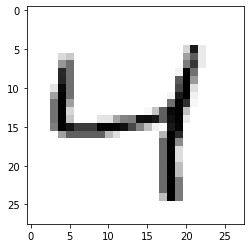

In [ ]:
# 이미지 출력

import matplotlib.pyplot as plt

images = np.reshape(train_images[2],[28,28])
plt.imshow(images, cmap='Greys')
plt.show()

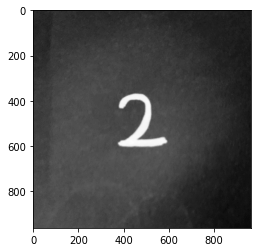

In [ ]:
#aa=im_test.reshape([28,28])
plt.imshow(im_gray, cmap='Greys')
plt.show()